<a href="https://colab.research.google.com/github/Ashi743/deep-learning-/blob/main/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential

In [3]:
(X_train,Y_train),(X_test ,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
X_train.shape  #every number with 28 ows and 28 cols

(60000, 28, 28)

In [6]:
Y_train.shape

(60000,)

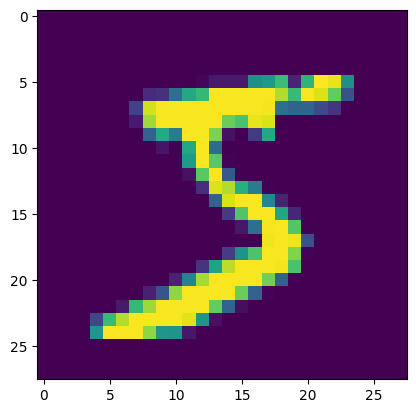

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [8]:
#scaling
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

X_train= X_train/255
X_test = X_test/255

In [18]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))        #input
model.add(Dense(128,activation='relu'))
model.add(Dense(164,activation='relu'))
model.add(Dense(10,activation='softmax'))      #output

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 164)                 │          21,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,286 (481.59 KB)

 Trainable params: 123,286 (481.59 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history= model.fit(X_train,Y_train,epochs=11, validation_split =0.2)

Epoch 1/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8698 - loss: 0.4428 - val_accuracy: 0.9578 - val_loss: 0.1430
Epoch 2/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9663 - loss: 0.1075 - val_accuracy: 0.9697 - val_loss: 0.0977
Epoch 3/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9786 - loss: 0.0693 - val_accuracy: 0.9697 - val_loss: 0.1007
Epoch 4/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9846 - loss: 0.0482 - val_accuracy: 0.9760 - val_loss: 0.0806
Epoch 5/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9877 - loss: 0.0378 - val_accuracy: 0.9732 - val_loss: 0.0929
Epoch 6/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9889 - loss: 0.0317 - val_accuracy: 0.9728 - val_loss: 0.1036
Epoch 7/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9716 - val_loss: 0.1106
Epoch 8/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9936 - loss: 0.01

In [22]:
y_prob= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
y_pred= y_prob.argmax(axis=1)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9772

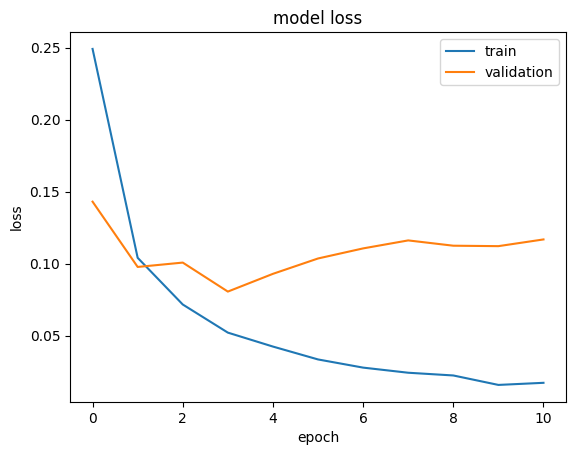

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

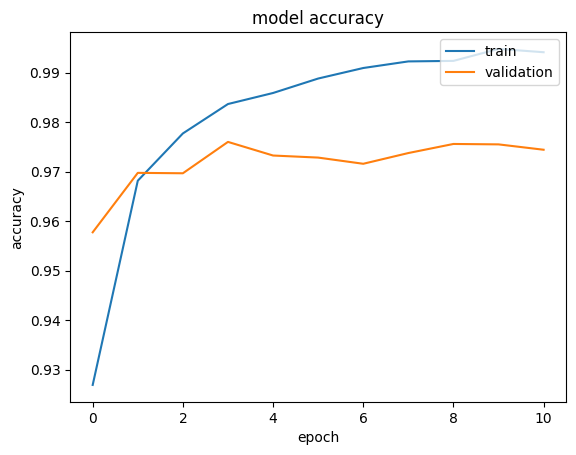

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

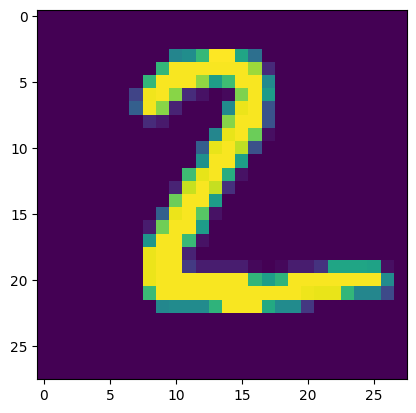

In [32]:
plt.imshow(X_test[1])

In [37]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([2])